In [28]:
# Importing modules
import numpy as np
from matplotlib import pyplot as plt
import os
import datetime
import timeit
import time
import pickle
from statistics import mean 
from os.path import dirname as up

print("ok")

# setting path to data
repo_path = os.getcwd()

# functions to use:
def get_pickle_path(repo_path):
    two_up_path = up(up(repo_path))
    python_file_path = os.path.join(two_up_path, "Python")
    pickle_path = os.path.join(python_file_path, "Pickle_data") 
    return pickle_path

def round_done():
    os.chdir(repo_path)
    print("done")

save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

print("done")
# go back to original directory
os.chdir(repo_path)

ok
done


I'd like to go through all the files in my current data folder.
plot them out - and save to an image.
the figure will have a flie name with a format:
fig_2020_09_01.png
saved to the original directory in the figs folder.

- go_to_pickle_data(repo_path)
- get data
- print out the data
- go back to fig_path
- save
- go back to the original directory.

In [43]:
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

saved_files = os.listdir()
print("files in directory:\n",saved_files)

round_done()

files in directory:
 ['data_130920n1219.pickle', 'data_140920n1818.pickle', 'data_200913n1600.pickle', 'data_200915__1140.pickle', 'data_200915__1700.pickle', 'data_200915__2300.pickle', 'data_200916__1248.pickle', 'data_20200923_0905.pickle', 'data_20200924_1510.pickle', 'data_dump_090920n1914.pickle', 'data__20200916_1754.pickle', 'data__20200916_1827 - Copy.pickle', 'data__20200916_1827.pickle', 'data__20200916_1827_Copy.pickle', 'data__20200917_1418.pickle', 'data__20200917_1458.pickle', 'data__20200917_1529.pickle', 'data__20200917_1716.pickle', 'data__20200917_1811.pickle', 'data__20200917_1855.pickle', 'data__20200921_1228.pickle', 'data__20200923_0815.pickle', 'demo_3min_data__20200916_1812.pickle', 'demo_3min_data__20200916_1819.pickle', 'demo_run_0931.pickle', 'demo_run_20200916_1419.pickle', 'demo_run_20200916_1422.pickle', 'desktop.ini']
done


In [46]:
# 20200916_1827

list_of_files_yet_to_open = saved_files.copy()
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200916_1827_Copy.pickle'
list_of_files_yet_to_open.remove(file_name)

f = open(file_name,'rb')
scope_data = pickle.load(f)
print(scope_data[0])

start_time = scope_data[1]

# get time stamps, this takes a while.
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                time_stamps.append(temp_array[1])
        except EOFError:
            pass
        
print("timestamps data retrieved")
print(len(time_stamps))

# print("all the time stamps:")
# for x in range(len(time_stamps)):
#     print(x," Started at :", datetime.datetime.fromtimestamp(time_stamps[x]).strftime('%Y-%m-%d %H:%M:%S'))  

round_done()

str_of_vars,t_stamp,ch1_data,ch1_time,ch3_data,ch3_time,ch4_data,ch4_time,ch1_data_again,ch1_time_again
timestamps data retrieved
done
85
done


In [47]:
# 20200916_1827

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get avg data from ch1 [Amplified x axis]
ch1_data = []
ch1_time = []
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                ch1_data.append(mean( temp_array[2])) 
                #temp_time = temp_array[3]
                #time_diff = temp_array[1]/60 - start_time
                #temp_time = [x+time_diff for x in temp_time] 
                ch1_time.append(temp_array[1]) 
                
        except EOFError:
            pass
print("done, got data for ch1")
ch1_time_min= [(x - start_time)/60 for x in ch1_time]  
round_done()

done, got data for ch1
done


20200916_1827


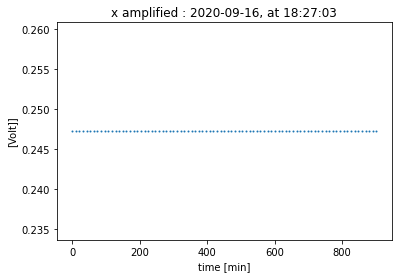

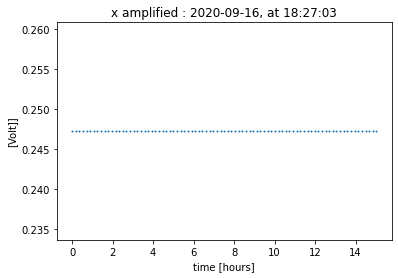

In [52]:
# 20200916_1827 - saving images

save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')

plt.scatter(ch1_time_min, ch1_data,s = 1)
save_name = "fig_"+add_the_time+"_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

ch1_time_h= [x/60 for x in ch1_time_min]  

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [hours]') 
plt.ylabel('[Volt]]')

plt.scatter(ch1_time_h, ch1_data,s = 1)
save_name = "fig_"+add_the_time+"_hours"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()


round_done()

In [37]:
print(len(list_of_files_yet_to_open))
print(list_of_files_yet_to_open)


27
['data_130920n1219.pickle', 'data_140920n1818.pickle', 'data_200913n1600.pickle', 'data_200915__1140.pickle', 'data_200915__1700.pickle', 'data_200915__2300.pickle', 'data_200916__1248.pickle', 'data_20200923_0905.pickle', 'data_20200924_1510.pickle', 'data_dump_090920n1914.pickle', 'data__20200916_1754.pickle', 'data__20200916_1827 - Copy.pickle', 'data__20200916_1827.pickle', 'data__20200917_1418.pickle', 'data__20200917_1458.pickle', 'data__20200917_1529.pickle', 'data__20200917_1716.pickle', 'data__20200917_1811.pickle', 'data__20200917_1855.pickle', 'data__20200921_1228.pickle', 'data__20200923_0815.pickle', 'demo_3min_data__20200916_1812.pickle', 'demo_3min_data__20200916_1819.pickle', 'demo_run_0931.pickle', 'demo_run_20200916_1419.pickle', 'demo_run_20200916_1422.pickle', 'desktop.ini']


ValueError: list.remove(x): x not in list